# Introduction

In this data analysis project, there are two datasets to work with, which are `observations` and `species_info`. The `observations` dataset is about the times that a certain species is observed in a park. The `species_info` contains the attributes of a certain species, these attributes are category, scientific_name, common_names and conservation_status.

The questions that this project wants to answer:
1. What is the distribution of conservation_status for animals?
2. Are certain category more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which species were spotted the most at each park?

## Importing necessary packages and Loading of data
Tools needed:
- numpy
- pandas
- matplotlib
- seaborn
***

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

print(observations.head())
print(species_info.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

## Data Diagnosis
***

In [26]:
print(observations.info())
print(observations.describe())
print(observations.duplicated().unique())
print(species_info.info())
print(species_info.duplicated().unique())
print(species_info['scientific_name'].duplicated().unique())
print(species_info['conservation_status'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB
None
       observations
count  23281.000000
mean     142.280357
std       69.885439
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
[False]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 570 to 2957
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
me

As shown above, both datasets do not have strange outliers. However, the `observations` dataset has duplicate rows as show by the `.duplicated` method. Hence, we will need to remove them by using `drop_duplicates()`. Also, the `species_info` dataset contains duplicates in the scientific_name column, even thought there is no duplicates when we apply `.duplicated to the whole dataset`. Hence we will need to remove the duplicates. Furthermore, the `species_info` data contains NaN values in the conservation_status column, which might requires a replacement of the NaN value to no status or a removal of those rows that contain nan values depending on the questions that we are trying to answer.
***

In [34]:
observations = observations.drop_duplicates()
## to ensure not dropping the rows with the correct values in conservation_status, we sort the data first
species_info = species_info.sort_values(by='conservation_status')
species_info.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

##checking that duplicates are removed
print(observations.duplicated().unique())
print(species_info['scientific_name'].duplicated().unique())
print(species_info['conservation_status'].unique())

[False]
[False]
['Endangered' 'In Recovery' 'Species of Concern' 'Threatened' nan]


## Analysis

### What is the distribution of conservation_status for animals?
I will use a bar plot to represent the distribution of the conservation_status for the animals. I will also remove the NaN values in conservation_status column since there are too many of them, which will affect the representation.

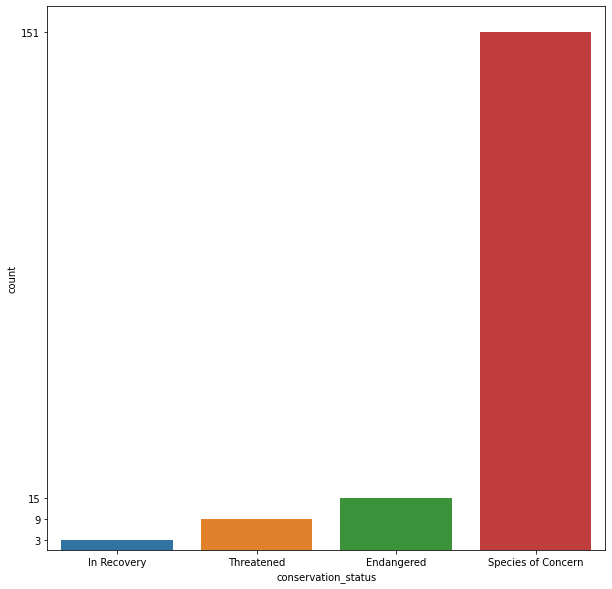

The number of No status is 5363.


In [54]:
species_info['conservation_status'].replace({np.nan: 'No status'}, inplace=True)
temp = species_info.replace({'No status': np.nan}).dropna()
##plot
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.countplot(data=temp, x='conservation_status', order=temp['conservation_status'].value_counts(ascending=True).index)
ax.set_yticks([len(species_info[species_info['conservation_status'] == 'Endangered']), len(species_info[species_info['conservation_status'] == 'In Recovery']), len(species_info[species_info['conservation_status'] == 'Species of Concern']), len(species_info[species_info['conservation_status'] == 'Threatened'])])
plt.show()

print('The number of No status is ' + str(len(species_info[species_info['conservation_status'] == 'No status'])) + '.')

#### Conclusion
This distribution shows that for the animals that have a conservation status, most of them are species of concern(151).
***

### Are certain category more likely to be endangered?